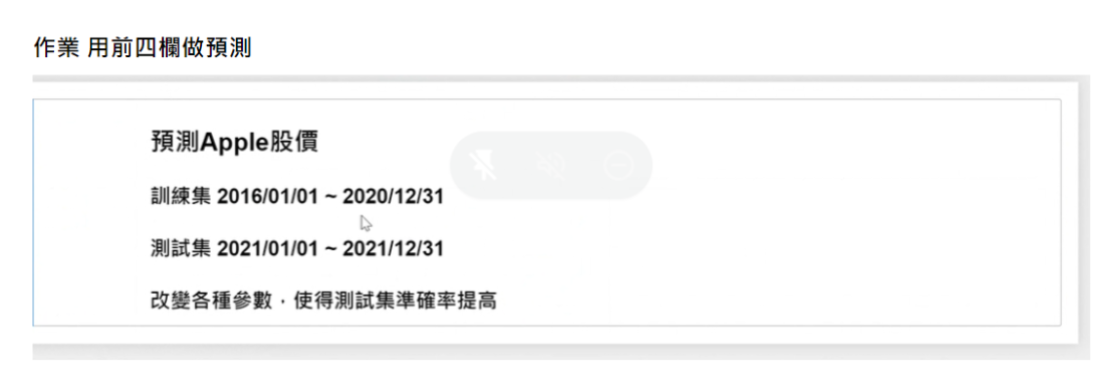

## 先做最基本，只用第四欄預測，並且沒有做參數更改，之後會有改變參數的

In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

np.random.seed(10)

Using TensorFlow backend.


In [2]:
df_train = pd.read_csv("./data/AAPL_Stock_Price_Train.csv",
                      index_col = "Date",parse_dates = True)
X_train_set = df_train.iloc[:,4:5].values

sc = MinMaxScaler()
X_train_set = sc.fit_transform(X_train_set)

In [3]:
print(X_train_set[:10])
print(len(X_train_set))
print(len(X_train_set[0]))

[[0.02800248]
 [0.02270939]
 [0.01867949]
 [0.01015855]
 [0.01118103]
 [0.01432879]
 [0.01719584]
 [0.01204317]
 [0.01631366]
 [0.01152189]]
1258
1


In [4]:
def create_dataset(ds, look_back = 1):
    X_data, Y_data = [],[]
    for i in range(len(ds) - look_back):
        X_data.append(ds[i:(i+look_back),0])
        Y_data.append(ds[i+look_back,0])
    
    return np.array(X_data), np.array(Y_data)

In [5]:
look_back = 60
X_train, Y_train = create_dataset(X_train_set, look_back)
print("回看天數: ",look_back)
print("X_train.shape: ",X_train.shape)
print("Y_train.shape: ",Y_train.shape)

回看天數:  60
X_train.shape:  (1198, 60)
Y_train.shape:  (1198,)


In [6]:
print(X_train[0])

[0.02800248 0.02270939 0.01867949 0.01015855 0.01118103 0.01432879
 0.01719584 0.01204317 0.01631366 0.01152189 0.01057955 0.01084025
 0.00985777 0.02012307 0.01615329 0.01725599 0.00408359 0.00542692
 0.01194295 0.01011843 0.00620887 0.00995805 0.01151022 0.00630942
 0.0083051  0.00826476 0.00681338 0.00566439 0.00624893 0.01159087
 0.01457425 0.01082485 0.01038137 0.0120747  0.00766001 0.01050232
 0.01183276 0.01213517 0.01169164 0.01943237 0.01987585 0.02138769
 0.02443154 0.02213356 0.02044026 0.0206217  0.02072244 0.02291973
 0.02344385 0.0275964  0.0303984  0.03005573 0.03029757 0.03027747
 0.03191028 0.03072091 0.02979362 0.02882607 0.03384537 0.03763514]


In [7]:
print(Y_train[0])

0.036486141858193655


In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
print("X_train.shape: ",X_train.shape)
print("Y_train.shape: ",Y_train.shape)

X_train.shape:  (1198, 60, 1)
Y_train.shape:  (1198,)


In [9]:
print(X_train[0])

[[0.02800248]
 [0.02270939]
 [0.01867949]
 [0.01015855]
 [0.01118103]
 [0.01432879]
 [0.01719584]
 [0.01204317]
 [0.01631366]
 [0.01152189]
 [0.01057955]
 [0.01084025]
 [0.00985777]
 [0.02012307]
 [0.01615329]
 [0.01725599]
 [0.00408359]
 [0.00542692]
 [0.01194295]
 [0.01011843]
 [0.00620887]
 [0.00995805]
 [0.01151022]
 [0.00630942]
 [0.0083051 ]
 [0.00826476]
 [0.00681338]
 [0.00566439]
 [0.00624893]
 [0.01159087]
 [0.01457425]
 [0.01082485]
 [0.01038137]
 [0.0120747 ]
 [0.00766001]
 [0.01050232]
 [0.01183276]
 [0.01213517]
 [0.01169164]
 [0.01943237]
 [0.01987585]
 [0.02138769]
 [0.02443154]
 [0.02213356]
 [0.02044026]
 [0.0206217 ]
 [0.02072244]
 [0.02291973]
 [0.02344385]
 [0.0275964 ]
 [0.0303984 ]
 [0.03005573]
 [0.03029757]
 [0.03027747]
 [0.03191028]
 [0.03072091]
 [0.02979362]
 [0.02882607]
 [0.03384537]
 [0.03763514]]


In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, 
               input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1)) # 不用加激活函數，出來即是答案

In [11]:
model.compile(loss = "mse", optimizer = "adam")
history = model.fit(X_train, Y_train,epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0197A: 1s - los - ETA: 0s - los
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0029
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0023
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0024
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0023
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0019
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0022
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0020
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0020
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0017
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0020
Epoch 12/100
1198/1198 [=======================

1198/1198 [==============================] - 4s 3ms/step - loss: 7.1928e-04
Epoch 96/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.0292e-04
Epoch 97/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.5818e-04
Epoch 98/100
1198/1198 [==============================] - 3s 3ms/step - loss: 6.8421e-04
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 7.5255e-04
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 8.4503e-04


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

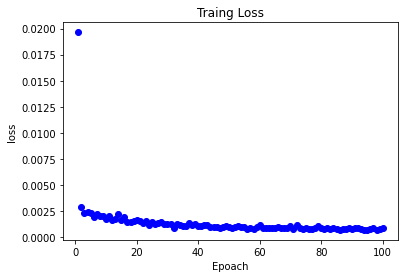

In [13]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label = "Training Loss")

plt.title("Traing Loss")
plt.xlabel("Epoach")
plt.ylabel("loss")
plt.show()

In [50]:
df_test = pd.read_csv("./data/AAPL_Stock_Price_Test.csv")
X_test_set = df_test.iloc[:, 4:5].values
X_test, Y_test = create_dataset(X_test_set, look_back)

In [51]:
for i in range(look_back):
    X_test[:, i:i+1] = sc.transform(X_test[:, i: i+1])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [52]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
print("X_test.shape: ",X_test.shape)
print("Y_test.shape: ",Y_test.shape)

X_test.shape:  (191, 60, 1)
Y_test.shape:  (191,)


In [53]:
X_test_pred = model.predict(X_test)
X_test_pred_price  = sc.inverse_transform(X_test_pred)

In [54]:
print(X_test_pred_price[:10])

[[121.40277 ]
 [121.614334]
 [122.137634]
 [123.25062 ]
 [124.53849 ]
 [125.89138 ]
 [127.39683 ]
 [129.13036 ]
 [130.25278 ]
 [131.2725  ]]


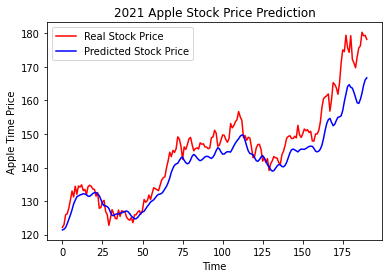

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Y_test, color = "red", label = "Real Stock Price")
plt.plot(X_test_pred_price, color = "blue", label = "Predicted Stock Price")
plt.title("2021 Apple Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Apple Time Price")
plt.legend()
plt.show()

## 四個欄位都做預測，使用ModelCheckpoint，並且將神經元數目改成60，batch_size 改成8，epoch 改成50

In [83]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

np.random.seed(10)

df_train = pd.read_csv("./data/AAPL_Stock_Price_Train.csv",
                      index_col = "Date",parse_dates = True)
X_train_set = df_train.iloc[:,1:5].values

sc = MinMaxScaler()
X_train_set = sc.fit_transform(X_train_set)

def create_dataset(ds, look_back = 1):
    X_data, Y_data = [],[]
    for i in range(len(ds) - look_back):
        X_data.append(ds[i:(i+look_back)])
        Y_data.append(ds[i+look_back])
    
    return np.array(X_data), np.array(Y_data)

look_back = 60
X_train, Y_train = create_dataset(X_train_set, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],4))

model = Sequential()
model.add(LSTM(60, return_sequences = True, 
               input_shape = (X_train.shape[1],4)))
model.add(Dropout(0.2))
model.add(LSTM(60, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(60))
model.add(Dropout(0.2))
model.add(Dense(4)) # 不用加激活函數，出來即是答案

model.compile(loss = "mse", optimizer = "adam",metrics=['mse'])
history = model.fit(X_train, Y_train,epochs = 50, batch_size = 8)

from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint("best_model.h5",monitor = "mse", mode = "min",
                  verbose = 1, save_best_only = True)
history = model.fit(X_train, Y_train, validation_split = 0.2,
                    epochs = 50, batch_size = 8,
                    verbose = 0, callbacks =[mc])      


Epoch 1/50
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0089 - mse: 0.0089
Epoch 2/50
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0035 - mse: 0.0035
Epoch 3/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0030 - mse: 0.0030
Epoch 4/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0026 - mse: 0.0026
Epoch 5/50
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0025 - mse: 0.0025
Epoch 6/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0021 - mse: 0.0021
Epoch 7/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0020 - mse: 0.0020
Epoch 8/50
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0018 - mse: 0.0018
Epoch 9/50
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0014 - mse: 0.0014
Epoch 10/50
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0016 - mse: 0.0016
Epoch 11/50
1198/11

我不知道為什麼ModelCheckpoint 的mse 和 model.compile 的mse不一樣，抱歉

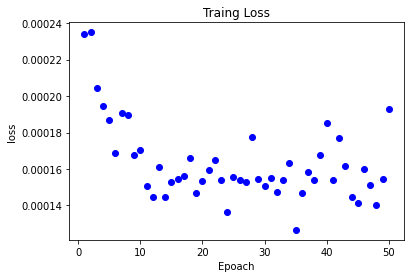

In [85]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label = "Training Loss")

plt.title("Traing Loss")
plt.xlabel("Epoach")
plt.ylabel("loss")
plt.show()

## 預測第四個欄位，並且將神經元數目改成120，batch_size 改成4，epoch 改回100

In [3]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

np.random.seed(10)

df_train = pd.read_csv("./data/AAPL_Stock_Price_Train.csv",
                      index_col = "Date",parse_dates = True)
X_train_set = df_train.iloc[:,4:5].values

sc = MinMaxScaler()
X_train_set = sc.fit_transform(X_train_set)

def create_dataset(ds, look_back = 1):
    X_data, Y_data = [],[]
    for i in range(len(ds) - look_back):
        X_data.append(ds[i:(i+look_back),0])
        Y_data.append(ds[i+look_back,0])
    
    return np.array(X_data), np.array(Y_data)

look_back = 60
X_train, Y_train = create_dataset(X_train_set, look_back)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

model = Sequential()
model.add(LSTM(120, return_sequences = True, 
               input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(120, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(120))
model.add(Dropout(0.2))
model.add(Dense(1)) # 不用加激活函數，出來即是答案

model.compile(loss = "mse", optimizer = "adam",metrics=['mse'])
history = model.fit(X_train, Y_train,epochs = 100, batch_size = 4)



Epoch 1/100
1198/1198 [==============================] - 26s 21ms/step - loss: 0.0035 - mse: 0.0035
Epoch 2/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0020 - mse: 0.0020
Epoch 3/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0020 - mse: 0.0020
Epoch 4/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0015 - mse: 0.0015
Epoch 5/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0015 - mse: 0.0015
Epoch 6/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0013 - mse: 0.0013
Epoch 7/100
1198/1198 [==============================] - 28s 23ms/step - loss: 0.0011 - mse: 0.0011
Epoch 8/100
1198/1198 [==============================] - 26s 22ms/step - loss: 0.0012 - mse: 0.0012
Epoch 9/100
1198/1198 [==============================] - 27s 22ms/step - loss: 0.0013 - mse: 0.0013
Epoch 10/100
1198/1198 [==============================] - 30s 25ms/step - loss: 0.0012 - mse: 0.0012

1198/1198 [==============================] - 27s 23ms/step - loss: 5.5666e-04 - mse: 5.5666e-04
Epoch 78/100
1198/1198 [==============================] - 28s 24ms/step - loss: 5.8069e-04 - mse: 5.8069e-04
Epoch 79/100
1198/1198 [==============================] - 26s 22ms/step - loss: 6.4335e-04 - mse: 6.4335e-04
Epoch 80/100
1198/1198 [==============================] - 26s 22ms/step - loss: 5.9383e-04 - mse: 5.9383e-04
Epoch 81/100
1198/1198 [==============================] - 26s 22ms/step - loss: 6.4490e-04 - mse: 6.4490e-04
Epoch 82/100
1198/1198 [==============================] - 26s 22ms/step - loss: 5.3807e-04 - mse: 5.3807e-04
Epoch 83/100
1198/1198 [==============================] - 26s 22ms/step - loss: 5.2116e-04 - mse: 5.2116e-04
Epoch 84/100
1198/1198 [==============================] - 29s 24ms/step - loss: 4.9183e-04 - mse: 4.9183e-04
Epoch 85/100
1198/1198 [==============================] - 29s 24ms/step - loss: 5.8696e-04 - mse: 5.8696e-04
Epoch 86/100
1198/1198 [========

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 120)           58560     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 120)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 120)           115680    
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 120)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 120)               115680    
_________________________________________________________________
dropout_6 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

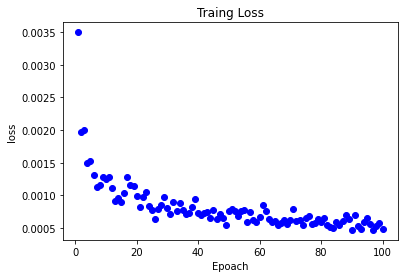

X_test.shape:  (191, 60, 1)
Y_test.shape:  (191,)
[[118.65383 ]
 [119.6573  ]
 [120.73191 ]
 [122.54506 ]
 [123.18951 ]
 [124.21607 ]
 [126.02213 ]
 [127.946495]
 [127.456825]
 [128.83781 ]]


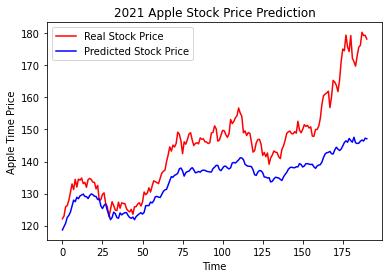

In [4]:
model.summary()

import matplotlib.pyplot as plt

loss = history.history["loss"]
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, "bo", label = "Training Loss")

plt.title("Traing Loss")
plt.xlabel("Epoach")
plt.ylabel("loss")
plt.show()

df_test = pd.read_csv("./data/AAPL_Stock_Price_Test.csv")
X_test_set = df_test.iloc[:, 4:5].values
X_test, Y_test = create_dataset(X_test_set, look_back)

for i in range(look_back):
    X_test[:, i:i+1] = sc.transform(X_test[:, i: i+1])
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
print("X_test.shape: ",X_test.shape)
print("Y_test.shape: ",Y_test.shape)

X_test_pred = model.predict(X_test)
X_test_pred_price  = sc.inverse_transform(X_test_pred)

print(X_test_pred_price[:10])

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(Y_test, color = "red", label = "Real Stock Price")
plt.plot(X_test_pred_price, color = "blue", label = "Predicted Stock Price")
plt.title("2021 Apple Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Apple Time Price")
plt.legend()
plt.show()